In [ ]:
''' compute timeseries of variables for wind power:
    - wind vector at 3.5m, 
    - wind stress adjusted to 10m using (1) COARE3.6, (2) simple power law
    - furthest distance from each other for the period considered (around TC intercept) 
    - ADCP profile
    - top bin of ADCP 
    - bandpass of top bin of ADCP
    (- wind power (5-min grid) )
    (- energy ) 
'''
import numpy as np
import netCDF4 as nc
import matplotlib
import matplotlib.pyplot as plt
import datetime
import os
import sys
path_nhchi = os.path.expanduser('~/Documents/projects/analytical-tools/py_nhchi/')
sys.path.insert(0, path_nhchi)
from windstr import Cd_e13_CH2020
from mystats import bandpass
from coare36vn_zrf_et import coare36vn_zrf_et

In [2]:
''' Read the time range for SD intercept file '''
year = '2022'
path = '/Users/chi/Documents/projects/sd-ni-wp/SD_wp_TCs/'
fn_intercept = 'time-range_SD_intercept(lt500km)_TCs_NA_'+year+'.txt'
TC_intercept = np.genfromtxt(path+fn_intercept, delimiter=' ',skip_header=1, usecols=(0,1), dtype=str)
ds_intercept = np.genfromtxt(path+fn_intercept, delimiter=' ',skip_header=1, usecols=(2,3,4), dtype=float)
print(type(TC_intercept),TC_intercept[0])
print(type(ds_intercept),ds_intercept[0])
''' settings '''
path_met = '/Users/chi/Documents/projects/sd-ni-wp/data_manipulate/data_merge_airsea/'
path_adcp = '/Users/chi/Documents/projects/sd-ni-wp/data_manipulate/data_merge_adcp/'
''' Read the SD-intercept TCs tracks (interp) '''
path = '/Users/chi/Documents/projects/sd-ni-wp/SD_wp_TCs/data_SD_TC-intercept/'
fn_SD_track = 'SD_intercept_TCs_tracks(interp)_NA_'+year+'.txt'
SD_TC_track_data = np.genfromtxt(path+fn_SD_track, delimiter=' ',skip_header=2, usecols=(0,7),dtype=str)
track_data = np.genfromtxt(path+fn_SD_track, delimiter=' ',skip_header=2, usecols=(1,6,9,10,11,12,13,14),dtype=float)
print('SD_TC track data:',SD_TC_track_data[0])
print('track_data:',track_data[0])

<class 'numpy.ndarray'> ['EARL' '1031']
<class 'numpy.ndarray'> [1.66234170e+09 1.66235268e+09 4.97900000e+02]
SD_TC track data: ['1031' 'EARL']
track_data: [ 1.66234170e+09  4.99999309e+02 -6.50404117e+01  2.00179216e+01
  0.00000000e+00  4.00000000e+00  3.05000000e+02  2.00000000e+00]


2022-SD1031 intercept EARL
tstamp_met[imet].shape= (184,) 2022-09-04 18:35:00 2022-09-04 21:38:00
tstamp_adcp[iadcp].shape= (18,) 2022-09-04 18:40:00 2022-09-04 21:30:00
2022-SD1040 intercept EARL
tstamp_met[imet].shape= (4629,) 2022-09-03 14:56:00 2022-09-06 20:04:00
tstamp_adcp[iadcp].shape= (463,) 2022-09-03 15:00:00 2022-09-06 20:00:00
2022-SD1031 intercept FIONA
tstamp_met[imet].shape= (4320,) 2022-09-17 01:37:00 2022-09-20 01:36:00
tstamp_adcp[iadcp].shape= (821,) 2022-09-17 01:40:00 2022-09-20 01:30:00
2022-SD1040 intercept FIONA
tstamp_met[imet].shape= (4627,) 2022-09-17 07:49:00 2022-09-20 12:55:00
tstamp_adcp[iadcp].shape= (835,) 2022-09-17 07:50:00 2022-09-20 12:50:00
2022-SD1078 intercept FIONA
tstamp_met[imet].shape= (2572,) 2022-09-21 13:33:00 2022-09-23 08:24:00


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


2022-SD1083 intercept FIONA
tstamp_met[imet].shape= (2471,) 2022-09-14 10:55:00 2022-09-16 04:05:00
tstamp_adcp[iadcp].shape= (491,) 2022-09-14 10:55:00 2022-09-16 04:00:00
2022-SD1031 intercept IAN
tstamp_met[imet].shape= (1851,) 2022-09-22 18:01:00 2022-09-24 00:51:00
tstamp_adcp[iadcp].shape= (185,) 2022-09-22 18:10:00 2022-09-24 00:50:00
2022-SD1032 intercept IAN
tstamp_met[imet].shape= (2445,) 2022-09-27 23:02:00 2022-09-29 15:46:00
tstamp_adcp[iadcp].shape= (489,) 2022-09-27 23:05:00 2022-09-29 15:45:00
2022-SD1059 intercept IAN
tstamp_met[imet].shape= (3671,) 2022-09-28 07:32:00 2022-09-30 20:42:00
tstamp_adcp[iadcp].shape= (347,) 2022-09-28 23:42:00 2022-09-30 17:30:00
2022-SD1031 intercept JULIA
tstamp_met[imet].shape= (689,) 2022-10-06 15:09:00 2022-10-07 02:37:00
tstamp_adcp[iadcp].shape= (69,) 2022-10-06 15:10:00 2022-10-07 02:30:00
2022-SD1040 intercept NICOLE
tstamp_met[imet].shape= (239,) 2022-11-06 12:01:00 2022-11-06 15:59:00
tstamp_adcp[iadcp].shape= (47,) 2022-11-06 

<Figure size 432x288 with 0 Axes>

<Figure size 1296x1080 with 0 Axes>

<Figure size 1296x1080 with 0 Axes>

<Figure size 1296x1080 with 0 Axes>

<Figure size 1296x1080 with 0 Axes>

<Figure size 1296x1080 with 0 Axes>

<Figure size 1296x1080 with 0 Axes>

<Figure size 1296x1080 with 0 Axes>

<Figure size 1296x1080 with 0 Axes>

<Figure size 1296x1080 with 0 Axes>

<Figure size 1296x1080 with 0 Axes>

<Figure size 1296x1080 with 0 Axes>

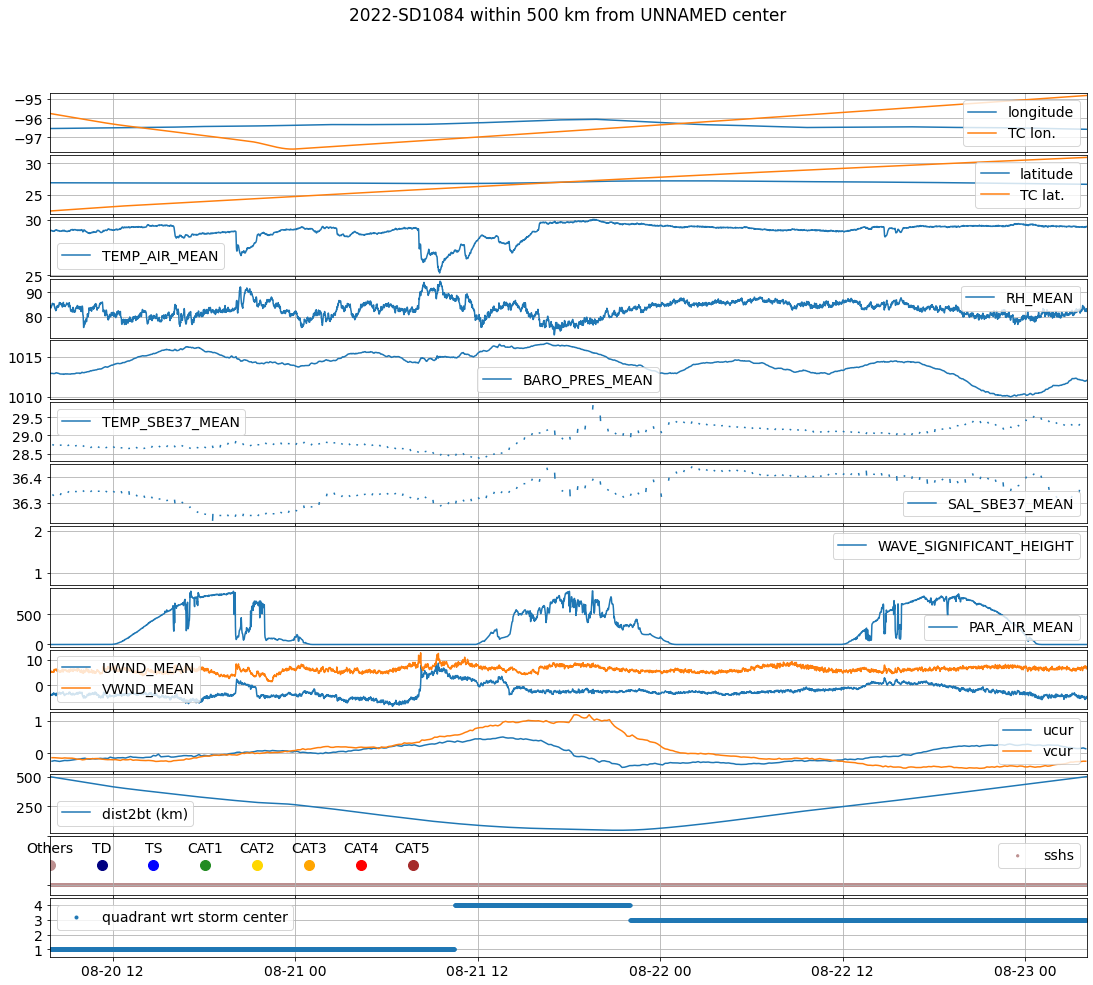

In [6]:
''' plot (1) timeseries of SD measurements during TC intercepts & 
            (2) TC info (distance, category, SD quadrant) '''
vars_met_str = ['longitude','latitude','TEMP_AIR_MEAN','RH_MEAN','BARO_PRES_MEAN','TEMP_SBE37_MEAN','SAL_SBE37_MEAN',\
                'WAVE_SIGNIFICANT_HEIGHT','PAR_AIR_MEAN','UWND_MEAN','VWND_MEAN']
irow_plot = [0,1,2,3,4,5,6,7,8,9,9]
nrow = irow_plot[-1]+5
ncol = 1
cols_sshs = ['rosybrown','rosybrown','rosybrown','rosybrown','navy','blue','forestgreen','gold','orange','red','brown']
strs_sshs = ['Others','TD','TS','CAT1','CAT2','CAT3','CAT4','CAT5']

for irow, SDname in enumerate( TC_intercept[:,1] ):
    TCname = TC_intercept[irow,0]
    print(year+'-SD'+SDname+' intercept '+TCname)
    ''' Read wind & met data (1-min) '''
    ds_met = nc.Dataset(path_met+'airsea-raw-merge-'+year+'-SD'+SDname+'.nc')
    tstamp_met = np.array([ (datetime.datetime(int(year),1,1)+datetime.timedelta(seconds=item)).timestamp() \
                           for item in np.ma.getdata(ds_met.variables['time'][:]) ])
    imet = np.where( (tstamp_met>= ds_intercept[irow,0]) & (tstamp_met<= ds_intercept[irow,1]) )[0]
    dtime_met_plot = np.array([datetime.datetime.fromtimestamp(item) for item in tstamp_met[imet]])
    print('tstamp_met[imet].shape=',tstamp_met[imet].shape, dtime_met_plot[0],dtime_met_plot[-1])
    ''' Read adcp data (5-min) '''
    if os.path.isfile(path_adcp+'adcp-raw-merge-'+year+'-SD'+SDname+'.nc'):
        ds_adcp = nc.Dataset(path_adcp+'adcp-raw-merge-'+year+'-SD'+SDname+'.nc')
        tstamp_adcp = np.array([ (datetime.datetime(int(year),1,1)+datetime.timedelta(seconds=item)).timestamp() \
                            for item in np.ma.getdata(ds_adcp.variables['time'][:]) ])
        iadcp = np.where( (tstamp_adcp>= ds_intercept[irow,0]) & (tstamp_adcp<= ds_intercept[irow,1]) )[0]
        dtime_adcp_plot = np.array([datetime.datetime.fromtimestamp(item) for item in tstamp_adcp[iadcp]])
        if len(iadcp)> 0:
            print('tstamp_adcp[iadcp].shape=',tstamp_adcp[iadcp].shape, dtime_adcp_plot[0],dtime_adcp_plot[-1])
        ucur = np.ma.getdata( ds_adcp.variables['vel_east'][:] )[iadcp,0]
        vcur = np.ma.getdata( ds_adcp.variables['vel_north'][:] )[iadcp,0]
        ds_adcp.close()
    
    ''' first, plot SD alongtrack met-ocean time series '''
    plt.clf()
    plt.rcParams.update({'font.size': 14})
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol)
    fig.set_size_inches(18, 15)
    for v, var in enumerate( vars_met_str ):
        isub = irow_plot[v]+1
        data = np.ma.getdata( ds_met.variables[var][:] )[imet]
        if var == 'PAR_AIR_MEAN':
            data = data/2.4 # W/m^2
        plt.subplot(nrow,ncol,isub)
        plt.plot(dtime_met_plot,data,label=var)
    ds_met.close()
    
    ''' +++++ plot 1st bin of adcp '''
    isub = isub+1
    plt.subplot(nrow,ncol,isub)
    if os.path.isfile(path_adcp+'adcp-raw-merge-'+year+'-SD'+SDname+'.nc'):
        plt.plot(dtime_adcp_plot, ucur, label='ucur')
        plt.plot(dtime_adcp_plot, vcur, label='vcur')
    
    ''' add TC info - find the rows in SD_intercept_TCs_tracks(interp)_NA file '''
    irow_SD_TC = np.where( (SD_TC_track_data[:,0] == SDname) & (SD_TC_track_data[:,1] == TCname) )[0]
    dtime_track_data = np.array([datetime.datetime.fromtimestamp(item) for item in track_data[irow_SD_TC,0]])
    ''' +++++ plot distance to best track '''
    isub = isub + 1
    plt.subplot(nrow,ncol,isub)
    plt.plot(dtime_track_data, track_data[irow_SD_TC,1],label='dist2bt (km)')
    ''' +++++ plot interpolated best track longitude & latitude '''
    plt.subplot(nrow,ncol,1)
    plt.plot(dtime_track_data, track_data[irow_SD_TC,2],label='TC lon.')
    plt.subplot(nrow,ncol,2)
    plt.plot(dtime_track_data, track_data[irow_SD_TC,3],label='TC lat.')
    ''' +++++ plot TC sshs '''
    cols = [cols_sshs[int(ind+5)] for ind in track_data[irow_SD_TC,4]]
    isub = isub+1
    plt.subplot(nrow,ncol,isub)
    plt.scatter(dtime_track_data, np.zeros(dtime_track_data.shape), c= cols,s=5,label='sshs')
    for i, str_sshs in enumerate(strs_sshs):
        dx = 0.05*i*(dtime_track_data[-1]-dtime_track_data[0])
        plt.plot(dtime_track_data[0]+dx, 0.2,'o',color=cols_sshs[i+3],ms=10)
        plt.text(dtime_track_data[0]+dx, 0.3, str_sshs,color='k',ha='center',va='bottom')
        plt.ylim([-0.1,0.5])
        plt.gca().set_yticklabels([])
    ''' +++++ plot SD quadrant relative to storm center '''
    isub = isub+1
    plt.subplot(nrow,ncol,isub)
    plt.plot(dtime_track_data,track_data[irow_SD_TC,7],'.',label='quadrant wrt storm center')
    plt.yticks([1,2,3,4])
    plt.ylim([0.5,4.5])
    
    ''' sub figure settings '''
    for i in range(nrow):
        plt.subplot(nrow,ncol,i+1)
        if i< nrow-1:
            plt.gca().set_xticklabels([])
        plt.xlim([datetime.datetime.fromtimestamp(ds_intercept[irow,0]),\
                  datetime.datetime.fromtimestamp(ds_intercept[irow,1])])
        plt.grid(axis='both')
        plt.legend()
    plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.1,hspace=0.05)
    plt.suptitle(year+'-SD'+SDname+' within 500 km from '+TCname+' center')
    ''' save figure '''
    plt.savefig('timeseries_'+year+'-SD'+SDname+'_lt500km-to-'+TCname+'.png')
    # break

In [4]:
print(os.path.isfile(path_adcp+fn_intercept))

False
